### STOCK DATA FOR S& P 500

In this notebook, min, max, opening, and closing stock indexes of S& P 500 are collected. <br/>
The resources for data collection are:<br/><br/>
<b>1- </b>Company names and symbols that are collected from Wikipedia.<br/>
<b>2- </b>yfinance library to retrieve data from YAHOO FINANCE with frequency of 1 index per day.
<br/><br/>
<b><p style="color:black;font-size:16px;">1- Company Names and Symbols </p></b><br/>
Wikipedia has a list of <b><i> S& P 505</i></b>, which will be retrieved to extract company informations such as company name, and symbol. Other information such as sector of the industry that the company is in can be extracted if required. <br/>
    <p style="color:blue;font-size:14px;"><b/>Source: </b></p>
    <p style="color:blue;font-size:12px;"> https://en.wikipedia.org/wiki/List_of_S%26P_500_companies </p> <br/>
An image showing the table that is retrieved from Wikipedia:<br/><br/>

<div>
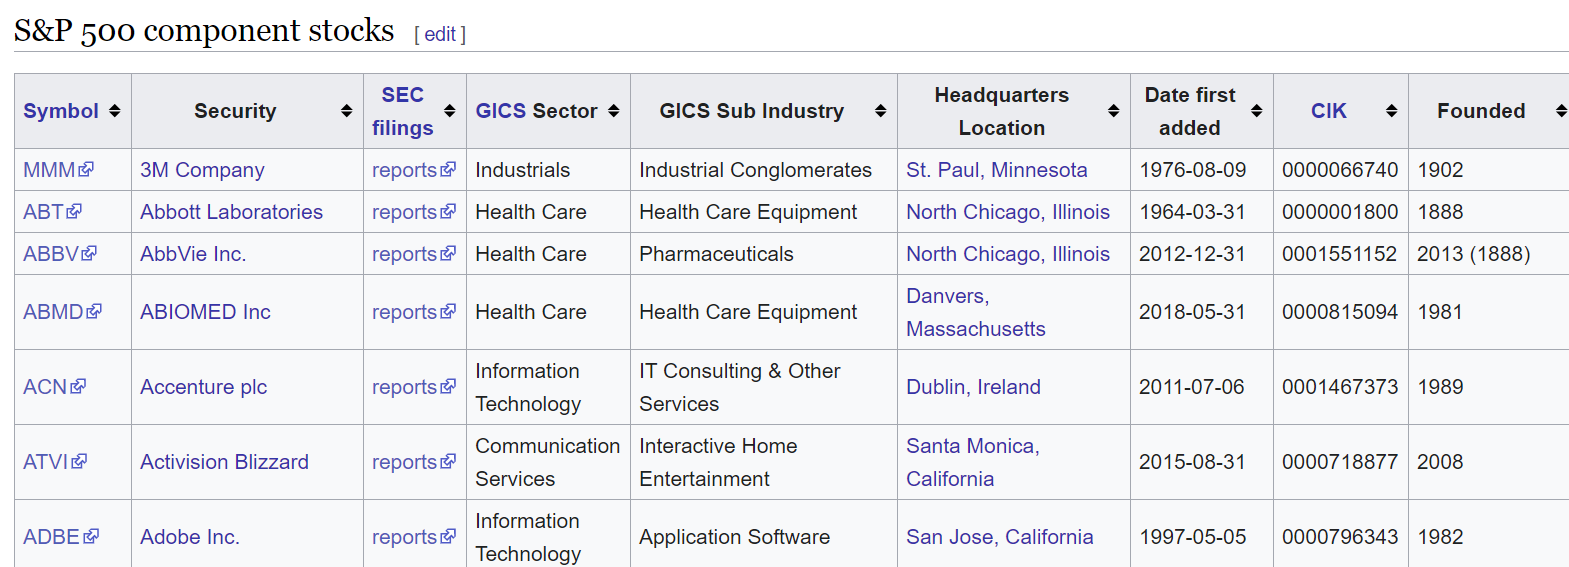
</div>
<br/>

To do so <b><i>"Selenium"</i></b> library is used to find address of company names in the <b><i> "html" </b></i> code of the following Wikipedia link:
    <p style="color:blue;font-size:14px;"> https://en.wikipedia.org/wiki/List_of_S%26P_500_companies </p> <br/>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

Input the link of the wikipedia that will be investigated:<br/><br/>

<p style="color:red;font-size:14px;"><b/>driver = webdriver.Chrome('C:/Users/arazavi/Desktop/Stock_Data/chromedriver') </b></p>
<p style="color:red;font-size:14px;"><b/>url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'<br/>
 </b></p>
<p style="color:red;font-size:14px;"><b/>driver.get(url)<br/>
 </b></p>


### Company Symobls
Now its time to find <b><i>"XPATH"</i></b> of the company symbols in the Wikipedia table. To do so, we inspect symbols of one of the companies: <br/><br/>

<div>
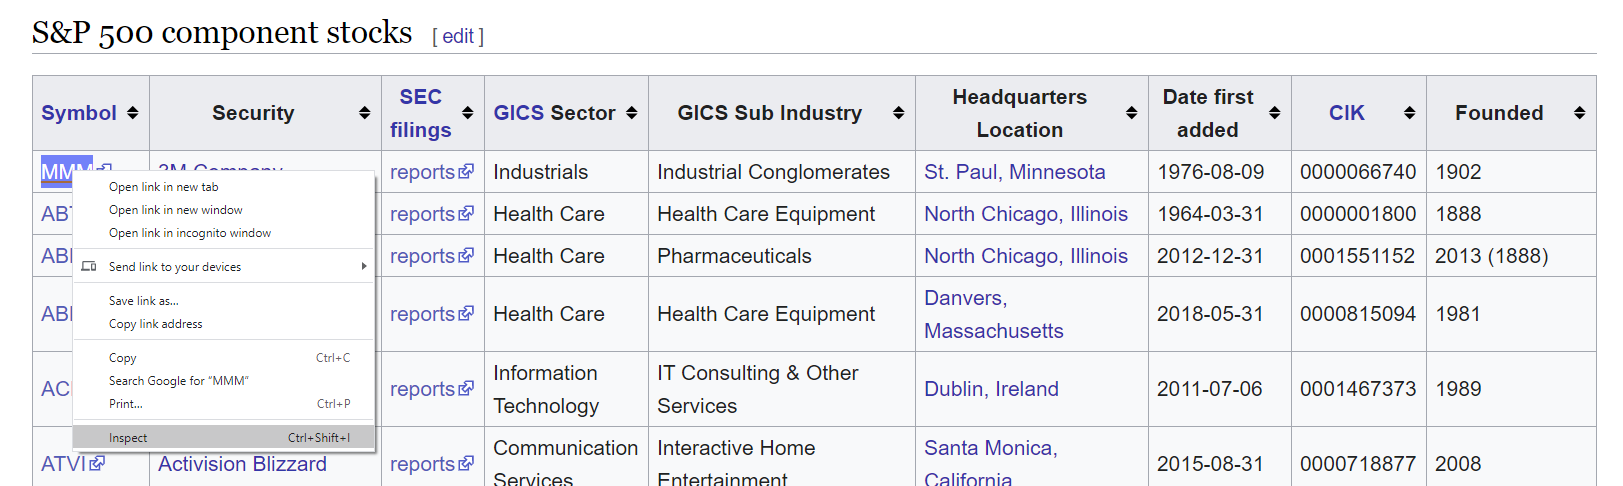
</div>
<br/><br/>
What we find is:<br/><br/>

<div>
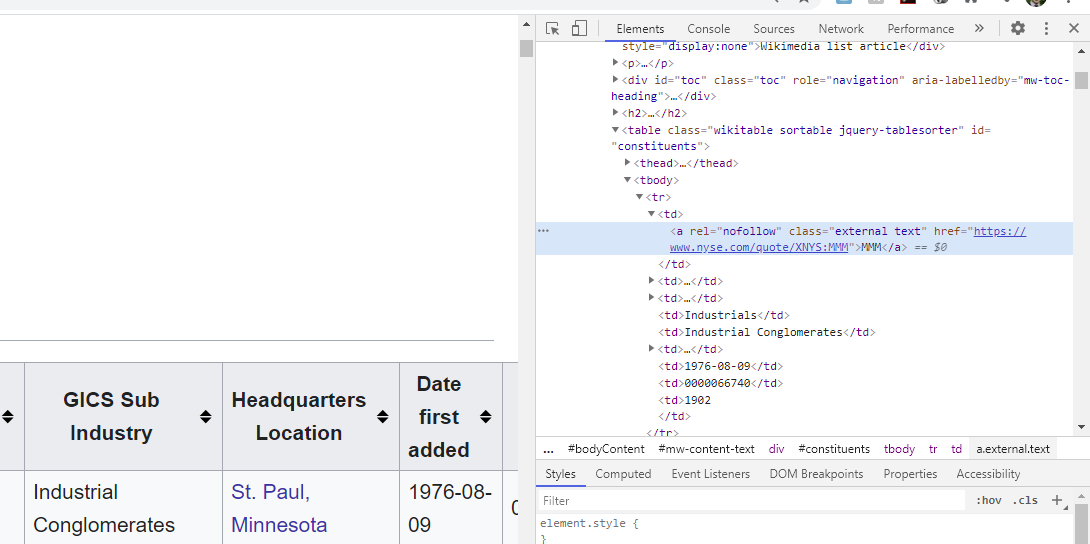
</div>
<br/><br/>

Using the find "by xpath" option, we refer to this attribute as:<br/><br/>
<p style="color:red;font-size:14px;"><b/>symbols = driver.find_elements_by_xpath('//td[@class='external text'])<br/>
 </b></p>

But we need a list of all 505 companies, so we create a loop that makes a list of all company symbols:
<p style="color:red;font-size:14px;"><b/>symbols_all=[]<br/>
 </b></p>    
<p style="color:red;font-size:14px;"><b/>for s in range(len(symbols)):<br/>
 </b></p>     
<p style="color:red;font-size:14px;"><b/>symobls_all.append(symbols[s].text)<br/>
 </b></p><br/>

In [ ]:
driver = webdriver.Chrome('C:/Users/arazavi/Desktop/Stock_Data/chromedriver')
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
driver.get(url)

symbols = driver.find_elements_by_xpath('//a[@class="external text"]')

In [ ]:
symbol_all = [] #List of all company's symbols

for i in range(0,1010,2):
    symbol_all.append(symbols[i].text)

<br/> To check that the data is correctly collected, we'll check the first 10, the last 10 and length of the data since we have 505 companies listed in S& P500<br/><br/>

In [ ]:
from termcolor import colored

print(colored('First 10 symbols: ', 'blue'))
print(colored(symbol_all[:10], 'red'))
print(colored('\nLast 10 symbols: ', 'blue'))
print(colored(symbol_all[-10:], 'red'))
print(colored('\nLength of the symbol list: ', 'blue'))
print(colored(len(symbol_all), 'red'))

<br/> 
### Company Full Name
Now that we have all symbols correctly listeed, we collect complete name of all companies, corresponding to each symbol. After <b> <i>"inspect" </i></b>ing company's name, we notice that both company name and addresses use the same set of attributes in html code, both under a/href and containing "/wiki/" string in their xpath.
<br/><br/><br/>
<div>
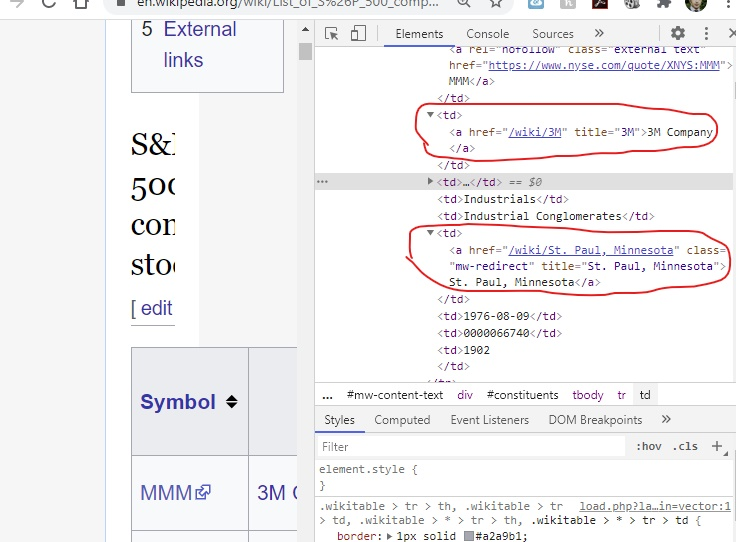
</div>
<br/><br/>

To resolve this issue, we use path by order. Looking at the upstream tags, we see that company name is under second <td> under <tr>, so we will refer to second td/a/href and a text that contains "/wiki/" in it. This code is written below:<br/>

In [ ]:
driver = webdriver.Chrome('C:/Users/arazavi/Desktop/Stock_Data/chromedriver')
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
driver.get(url)

company_address = driver.find_elements_by_xpath('//td[2]//a[contains(@href,"/wiki/")]')

In [ ]:
company_name_all = [] #Initiate a list of all company's names
counter = 0 

for i in range(0,len(company_address)):
    company_name_all.append(company_address[i].text)
    
    if (counter == 504): #If the xpath is correct 505 company name is what we want
        break
    
    counter+=1

And finally we check first 10 and last 10 company names to make sure that they are correctly collected. Notice that we already fixed the length of the list to 505 (from 0 to 504).<br/><br/>

In [ ]:
print(colored('First 10 names: ', 'blue'))
print(colored(company_name_all[:10], 'red'))
print(colored('\nLast 10 names: ', 'blue'))
print(colored(company_name_all[-10:], 'red'))

In [ ]:
data_tuples = list(zip(symbol_all, company_name_all))

In [ ]:
data_tuples

In [ ]:
import pandas as pd
df_names = pd.DataFrame(data_tuples, columns = ['Abbrev', 'Full Name'])

In [ ]:
df_names.to_csv('SP500_Names.csv')

<b><p style="color:black;font-size:16px;">2- yfinance (YAHOO FINANCE) </p></b><br/>
<b/> </b> Next, the <i><b>"yfinance"</i></b> library is used to request stock indices for all collected company names. Notice that yfinance collects data by company abbreviation name from <b><i>"Yahoo Finance"</b></i> database.<br/><br/>

In [ ]:
import yfinance as yf

<br/>As an example abbreviation for Microsoft is <i><b>"msft"</i></b>. Let's look at how to get info of Microsoft including headquarters, number of employees, sector of industry, branch address and phones and website.<br/><br/>

In [ ]:
from termcolor import colored

msft = yf.Ticker("msft")

print(colored("           **********************************************************************************\n", 'blue', attrs=['bold']))
print(colored("           **********************        Information of Microsoft      **********************\n", 'blue', attrs=['bold']))
print(colored("           **********************************************************************************\n", 'blue', attrs=['bold']))
print(colored(msft.info, 'red'))
print(colored("\n\n           **********************************************************************************\n", 'blue', attrs=['bold']))


<br/>
Then, we retrieve stock index numbers and store it in a table. We retrieve all historical data.
<br/><br/><br/>

In [ ]:
msft_hist = msft.history(period="max")
msft_hist.head()

<br/>
It is clear that opening and closing index of each day as well as the low and high index value of the day are listed. Volume, divident and stock splits are other 3 data listed.
<br/>

We can convert the date to datetime data and extract year, month, day and time at which the data is collected:

In [ ]:
import pandas as pd

#Convert index (date) column to datetime data format
#msft_hist['DateTime'] = pd.to_datetime(msft_hist.index)

#Add new columns of year, month and day to the original dataframe
#msft_hist['Year'] = msft_hist['DateTime'].dt.strftime('%Y')
#msft_hist['Month'] = msft_hist['DateTime'].dt.strftime('%m')
#msft_hist['Day'] = msft_hist['DateTime'].dt.strftime('%d')
msft_hist.head(10)

<br/> Notice that data is not continous and 2 days are missing after every 5 consecutive days. These days are Saturday and Sunday.<br/><br/>

Before exporting the table, we will check if any data is missing. Since it is a 2d dataframe, we can use isnull() that outputs a bolean for each cell and take 2 sums (first over columns and then over rows) as follows:

In [ ]:
msft_hist.isnull().sum().sum()

Alternatively, we can use info() to check if there is any null data in any of the columns:

In [ ]:
msft_hist.info()

<br/>
Results show that <b> NO NULL </b> data is observed in the retreived dataframe.
<br/>
<br/>

We can do the same for all other 505 S& P 500 companies and create a database that includes and excel sheet for each of them. We will use a loop function that collects all the data.

In [ ]:
import os
base_dir = os.getcwd()
folder_name = base_dir + '\Stock_SP500'
dir_path = os.path.join(base_dir, folder_name)
print(dir_path)
if not os.path.exists(dir_path):
    os.mkdir(dir_path)

<br/> Collect all historical index data for each company and store it in a CSV file.<br/><br/>

In [ ]:
Stock_indices = {}
for counter, name in enumerate(symbol_all):
    #print('#'+str(counter+1)+' symbol is: ', s)
    Stock_indices[name] = yf.Ticker(name).history(period="max")
    Stock_indices[name].to_csv(dir_path+'/'+name+'.csv')

<br/> Make a list from company full names and symbols to guide you to each stored CSV file (stock indices). Then export the list in a separate CSV file.<br/><br/>

In [ ]:
data_tuples = list(zip(symbol_all, company_name_all))

In [ ]:
data_tuples

In [ ]:
import pandas as pd
df_names = pd.DataFrame(data_tuples, columns = ['Abbrev', 'Full Name'])

In [ ]:
df_names.to_csv('SP500_Names.csv')